# Lista de Exercícios 3

In [17]:
import pandas as pd

## Exercício 1

In [18]:
dt = pd.DataFrame()
dt['X'] = [0, 1, 2]
prob_cara = 0.4
prob_coroa = 0.6
dt['Frequencia_Relativa'] = [prob_coroa * prob_coroa, prob_cara * prob_coroa + prob_coroa * prob_cara, prob_cara * prob_cara]
dt['Frequencia_Acumulada'] = [dt.Frequencia_Relativa[dt.X <= i].sum() for i in range(3)]
dt

,X,Frequencia_Relativa,Frequencia_Acumulada
0,0,0.36,0.36
1,1,0.48,0.84
2,2,0.16,1.00


Text(0.5, 1.0, 'Função de Distribuição')

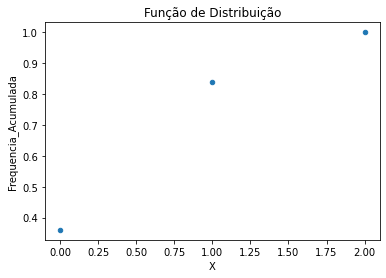

In [19]:
plot = dt.plot(x = 'X', y = 'Frequencia_Acumulada', kind = 'scatter')
plot.set_title("Função de Distribuição")

## Exercício 2

In [20]:
dt = pd.DataFrame()
dt["Enganos"] = [1, 2, 3]
dt["Probabilidade"] = [0.1, 0.2, 0.3]
dt["~Probabilidade"] = [0.9, 0.8, 0.7]
dt["Atraso (min)"] = [10, 20, 30]
dt

,Enganos,Probabilidade,~Probabilidade,Atraso (min)
0,1,0.1,0.9,10
1,2,0.2,0.8,20
2,3,0.3,0.7,30


In [21]:
dt_prob = pd.DataFrame()
dt_prob["Combinacoes"] = ["NNN", "ENN", "NEN", "NNE", "EEN", "NEE", "ENE", "EEE"]
dt_prob["Probabilidade"] = [0.9 * 0.8 * 0.7,
                            0.1 * 0.8 * 0.7,
                            0.9 * 0.2 * 0.7,
                            0.9 * 0.8 * 0.3,
                            0.1 * 0.2 * 0.7,
                            0.9 * 0.2 * 0.3,
                            0.1 * 0.8 * 0.3,
                            0.1 * 0.2 * 0.3]
dt_prob.loc[8] = ["TOTAL", dt_prob.Probabilidade.sum()]
dt_prob

,Combinacoes,Probabilidade
0,NNN,0.504
1,ENN,0.056
2,NEN,0.126
3,NNE,0.216
4,EEN,0.014
5,NEE,0.054
6,ENE,0.024
7,EEE,0.006
8,TOTAL,1.000


In [22]:
print("Probabilidade sem atraso: " + str(dt_prob[dt_prob.Combinacoes == "NNN"].Probabilidade[0]))

Probabilidade sem atraso: 0.504


In [23]:
print("Probabilidade com atraso: " + str(1 - dt_prob[dt_prob.Combinacoes == "NNN"].Probabilidade[0]))

Probabilidade com atraso: 0.496


In [24]:
selecao = dt_prob.Combinacoes.isin(["ENN", "NEN", "NNE", "EEN"])
print("Probabilidade de atraso abaixo de 40 minutos: " + str(dt_prob[selecao].Probabilidade.sum()))

Probabilidade de atraso abaixo de 40 minutos: 0.41200000000000003


In [25]:
selecao = dt_prob.Combinacoes.isin(["ENE", "NEE", "EEE"])
print("Probabilidade de atraso de 40 minutos ou acima: " + str(dt_prob[selecao].Probabilidade.sum()))

Probabilidade de atraso de 40 minutos ou acima: 0.08400000000000002


## Questão 3

In [26]:
dt_pipoca = pd.DataFrame()
dt_pipoca["Pipoca"] = ["SS", "SN", "N"]
dt_pipoca["Probabilidade"] = [0.7*0.5, 0.7*0.5, 0.3]
dt_pipoca["Custo"] = [2, 0, 0]
dt_pipoca

,Pipoca,Probabilidade,Custo
0,SS,0.35,2
1,SN,0.35,0
2,N,0.30,0


In [38]:
dt_bala = pd.DataFrame()
dt_bala["Bala"] = ["SS", "SN", "N"]
dt_bala["Probabilidade"] = [0.9*0.5, 0.7*0.5, 0.1]
dt_bala["Custo"] = [3, 0, 0]
dt_bala

,Bala,Probabilidade,Custo
0,SS,0.45,3
1,SN,0.35,0
2,N,0.10,0


In [35]:
selecao = dt_pipoca["Pipoca"].isin(["SN", "N"])
print("Quando o gasto extra com pipoca é zero?", dt_pipoca[selecao].Probabilidade.sum())

Quando o gasto com pipoca é zero? 0.6499999999999999


In [39]:
selecao = dt_bala["Bala"].isin(["SN", "N"])
print("Quando o gasto extra com bala é zero?", dt_bala[selecao].Probabilidade.sum())

Quando o gasto extra com bala é zero? 0.44999999999999996


In [44]:
dt_custo = pd.DataFrame()
dt_custo["Gastos"] = ["Pipoca e Bala", "Só pipoca", "Só bala", "Nenhum"]
dt_custo["Probabilidade"] = [0.35*0.45, 0.35 * (0.35+0.10), (0.35+0.30)*0.45, (0.35+0.30)*(0.35+0.10)]
dt_custo["Custo Total"] = [15+2+3, 15+2, 15+3, 15]
dt_custo["Custo Adicional"] = [2+3, 2, 3, 0]
dt_custo

,Gastos,Probabilidade,Custo Total,Custo Adicional
0,Pipoca e Bala,0.1575,20,5
1,Só pipoca,0.1575,17,2
2,Só bala,0.2925,18,3
3,Nenhum,0.2925,15,0


## Questão 4

In [77]:
dt_distr = pd.DataFrame()
dt_distr["X"] = ["x < 10", "10 <= x < 12", "12 <= x < 13", "13 <= x < 25", "x >= 25"]
dt_distr["Y"] = [0, 0.2, 0.5, 0.9, 1]
dt_distr

,X,Y
0,x < 10,0.0
1,10 <= x < 12,0.2
2,12 <= x < 13,0.5
3,13 <= x < 25,0.9
4,x >= 25,1.0


In [115]:
dt_prob = pd.DataFrame()
dt_prob["X"] = ["x < 10", "10 <= x < 12","12 <= x < 13", "13 <= x < 25", "x >= 25"]
dt_prob["Y"] = [dt_distr[dt_distr.index == i].Y.values[0] - dt_distr[dt_distr.index < i].Y.sum() for i in range(5)]
dt_prob

,X,Y
0,x < 10,0.0
1,10 <= x < 12,0.2
2,12 <= x < 13,0.3
3,13 <= x < 25,0.2
4,x >= 25,-0.6


In [128]:
# P(X <= 12)
print("P(X <= 12) = " + str(dt_distr.iloc[2]["Y"]))

P(X <= 12) = 0.5


In [131]:
# P(X < 12)
print("P(X < 12) = " + str(dt_distr.iloc[1]["Y"]))

P(X < 12) = 0.2


In [134]:
# P(12 <= X <= 20)
print("P(12 <= X <= 20) = " + str(dt_prob.iloc[2].Y + dt_prob.iloc[3].Y))

P(12 <= X <= 20) = 0.5


In [135]:
# P(X > 18)
print("P(X > 18) = " + str(dt_prob.iloc[3].Y))

P(X > 18) = 0.20000000000000007
